Initial Missing Values:
 MVI    0
dtype: int64
Missing Values after Interpolation:
 MVI    0
dtype: int64


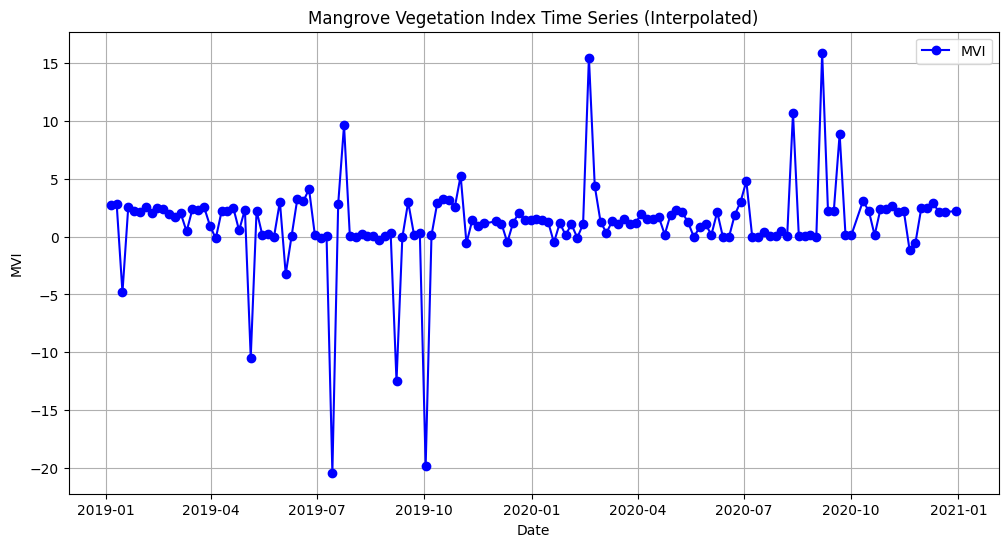

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('MVI_TimeSerieswithoutcloudcover.csv')

df['system:time_start'] = pd.to_datetime(df['system:time_start'], unit='ms')

df.set_index('system:time_start', inplace=True)

df.sort_index(inplace=True)

print("Initial Missing Values:\n", df.isnull().sum())

df['MVI'] = df['MVI'].interpolate(method='time')

print("Missing Values after Interpolation:\n", df.isnull().sum())

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MVI'], marker='o', linestyle='-', color='b', label='MVI')
plt.title('Mangrove Vegetation Index Time Series (Interpolated)')
plt.xlabel('Date')
plt.ylabel('MVI')
plt.grid(True)
plt.legend()

plt.savefig('MVI_TimeSeries_Interpolated.png', format='png', dpi=300, bbox_inches='tight')

plt.show()


Initial Missing Values:
 MVI    56
dtype: int64
Missing Values after Interpolation:
 MVI    0
dtype: int64


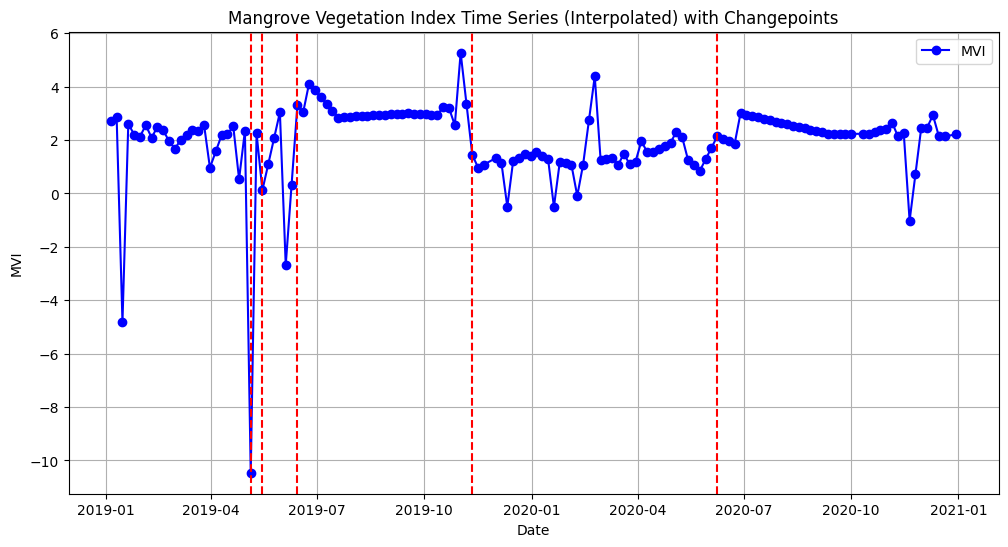

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

df = pd.read_csv('MVI_TimeSeries_DuringCyclone.csv')

df['system:time_start'] = pd.to_datetime(df['system:time_start'], unit='ms')

df.set_index('system:time_start', inplace=True)

df.sort_index(inplace=True)

print("Initial Missing Values:\n", df.isnull().sum())

df['MVI'] = df['MVI'].interpolate(method='time')

print("Missing Values after Interpolation:\n", df.isnull().sum())

signal = df['MVI'].values
model = "l2"  
algo = rpt.Binseg(model=model, jump=1).fit(signal)
n_bkps = 5  
bkps = algo.predict(n_bkps=n_bkps)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MVI'], marker='o', linestyle='-', color='b', label='MVI')
plt.title('Mangrove Vegetation Index Time Series (Interpolated) with Changepoints')
plt.xlabel('Date')
plt.ylabel('MVI')
plt.grid(True)
plt.legend()

for bkp in bkps[:-1]:  
    plt.axvline(df.index[bkp], color='r', linestyle='--', label='Changepoint')

plt.savefig('MVI_TimeSeries_Interpolated_Changepoints.png', format='png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


Initial Missing Values:
 MVI    56
dtype: int64
Missing Values after Interpolation:
 MVI    0
dtype: int64


C:\Users\Ayush\AppData\Local\Temp\ipykernel_13928\867271527.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').mean()


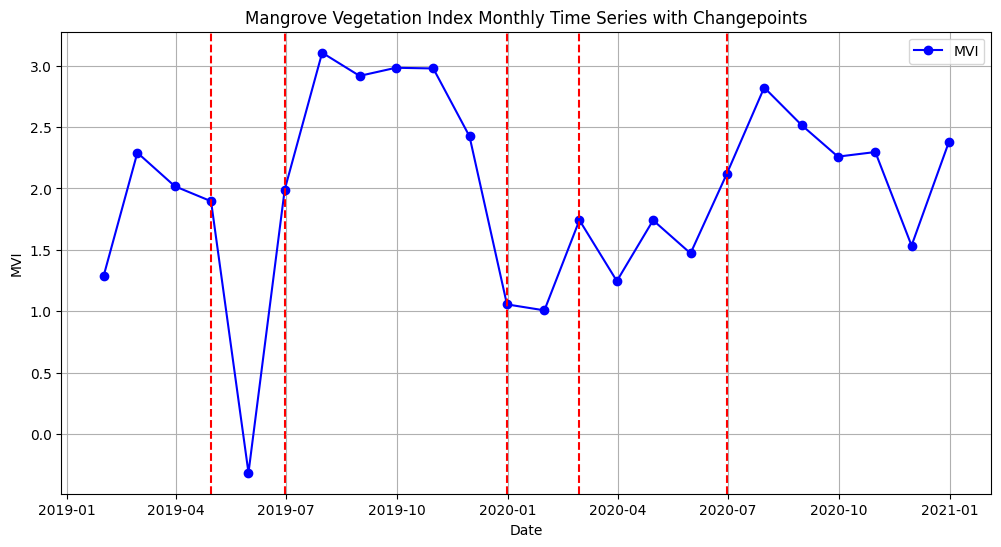

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

df = pd.read_csv('MVI_TimeSeries_DuringCyclone.csv')

df['system:time_start'] = pd.to_datetime(df['system:time_start'], unit='ms')

df.set_index('system:time_start', inplace=True)

df.sort_index(inplace=True)

print("Initial Missing Values:\n", df.isnull().sum())

df['MVI'] = df['MVI'].interpolate(method='time')

print("Missing Values after Interpolation:\n", df.isnull().sum())

monthly_data = df.resample('M').mean()

signal = monthly_data['MVI'].values
model = "l2" 
algo = rpt.Binseg(model=model, jump=1).fit(signal)
n_bkps = 5 
bkps = algo.predict(n_bkps=n_bkps)

plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['MVI'], marker='o', linestyle='-', color='b', label='MVI')
plt.title('Mangrove Vegetation Index Monthly Time Series with Changepoints')
plt.xlabel('Date')
plt.ylabel('MVI')
plt.grid(True)
plt.legend()
modified_csv_file_path = 'modified_MangroveVegetationIndex.csv'
monthly_data.to_csv(modified_csv_file_path)
for bkp in bkps[:-1]: 
    plt.axvline(monthly_data.index[bkp], color='r', linestyle='--', label='Changepoint')

# Save the plot as a PNG file
plt.savefig('MVI_Monthly_TimeSeries_Changepoints.png', format='png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
